# Radar Graph with Animation

This notebook walks through the plot of radar graph and network graph using matplotlib and networkx packages. It will also show how to make animations of radar graph to improve the visualization.

With the reference of [Python Graph Gallery](https://python-graph-gallery.com/390-basic-radar-chart/)


## Part 1. Radar Graph

Radar is useful when you try to compare multiple dimensions between multiple groups.

### 1.1 create a psedu dataframe 

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
from random import randint

group=['Group{}'.format(i) for i in range(1,11)]
strength =  [randint(1, 5) for p in range(0, 10)]
experience =  [randint(1, 5) for p in range(0, 10)]
emotion =  [randint(1, 5) for p in range(0, 10)]
language =  [randint(1, 5) for p in range(0, 10)]



Two ways to create a dictionary
1. use dict()

In [46]:
pd.DataFrame(dict(Group = group,
                  Strength = strength,
                  Experience = experience,
                  Emotion = emotion,
                  Language = language),
             columns=['Group','Strength','Experience','Emotion','Language'])

,Group,Strength,Experience,Emotion,Language
0,Group1,3,3,5,1
1,Group2,2,4,2,2
2,Group3,5,3,5,3
3,Group4,4,3,3,4
4,Group5,4,3,2,4
5,Group6,2,4,5,4
6,Group7,3,3,5,3
7,Group8,1,3,1,2
8,Group9,1,1,4,5
9,Group10,5,1,2,3


2. Use zip

In [47]:
pd.DataFrame(dict(zip(['Group','Strength','Experience','Emotion','Language'],
                      [group,strength,experience,emotion,language])),
             columns=['Group','Strength','Experience','Emotion','Language'])

,Group,Strength,Experience,Emotion,Language
0,Group1,3,3,5,1
1,Group2,2,4,2,2
2,Group3,5,3,5,3
3,Group4,4,3,3,4
4,Group5,4,3,2,4
5,Group6,2,4,5,4
6,Group7,3,3,5,3
7,Group8,1,3,1,2
8,Group9,1,1,4,5
9,Group10,5,1,2,3


In [48]:
performance = pd.DataFrame(dict(zip(['Group','Strength','Experience','Emotion','Language'],
                      [group,strength,experience,emotion,language])),
             columns=['Group','Strength','Experience','Emotion','Language'])

#### This performance dataframe records each group's scores in four areas: strength, experience, emotion and language. Now we would like to visulization their differences in different areas. The best way to visualize is radar graph.

### 1.2 Draw Radar function

In [101]:
from math import pi
def drawRadar(df):
    plt.figure(figsize=(15,15))
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ["1","2","3","4","5"], color="grey", size=7)  ##where you should edit with different levels of y
    plt.ylim(0,5)   # set y limit


    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    # Ind1
    for i in range(len(df)):
        values=df.loc[i].drop('Group').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=0, label="group {}".format(i+1))
        ax.fill(angles, values, alpha=0.1)

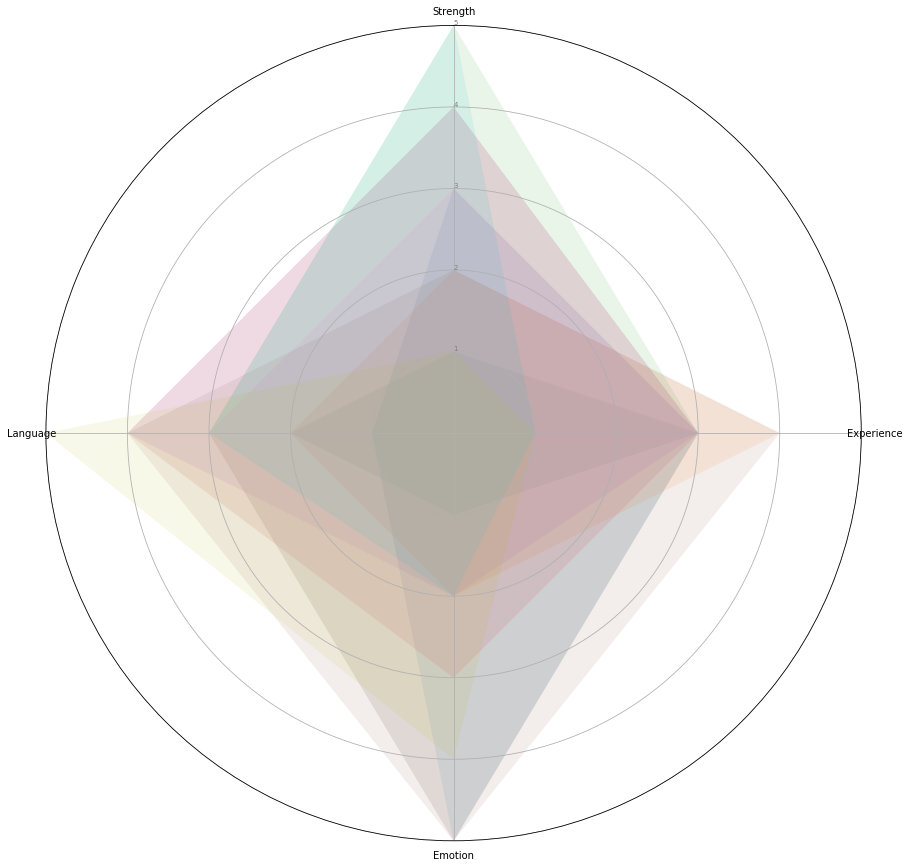

In [95]:
drawRadar(performance)

As you can see, due to 20 groups, it is hard to compare better. We introduce animation of radar graph here.

### 1.3 Draw Radar function with animation

In [128]:
import matplotlib.animation as animation
fig = plt.figure(figsize=(15,15))
categories=list(performance)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = fig.add_subplot(111, projection='polar')

# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3,4,5], ["1","2","3","4","5"], color="grey", size=7)
plt.ylim(0,5)

l,  = ax.plot([],[], linewidth=1, linestyle='solid')
ttl = ax.text(.5, 1.05, '', transform = ax.transAxes, va='center')
fill = ax.fill_between([], [],color='r')

#data=performance.iloc[0,:].values.flatten().tolist()
#data += data[:1]


def update(i):
    global data
    data=performance.iloc[i,:].drop('Group').values.flatten().tolist()
    data += data[:1]
    #data += (np.random.rand(50)+np.cos(i*2.*np.pi/50.))*2 
    #data[-1] = data[0]
    l.set_data(angles, data )
    ttl.set_text('group'+str(i))
    fill = ax.fill_between(angles,data)
    #fill.remove()
    #return l,
    return l, fill,

ani = animation.FuncAnimation(fig, update, frames=10, interval=1000, blit=True)
#plt.show()
plt.close()

In [129]:
from IPython.display import HTML
HTML(ani.to_jshtml())